<a href="https://colab.research.google.com/github/ddesai-sjsu/Machine-Learning/blob/main/Homework_Week_10_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Factor**

Sentiment Analysis (SA) is the branch of Natural Language Processing (NLP) in charge of the design and implementation of models, methods, and techniques to determine whether a text deals with objective or subjective information and, in the latter case, to determine if such information is expressed in a positive, neutral, or negative way as well as if it is expressed in a strong or weak way. Since a large part of the subjective content expressed by users on social networks is about opinions (on review sites, forums, message boards, chats, etc.), SA is also known as Opinion Mining (OM).


It is a very important factor in determining if a news or statement is fake because sentiment determines the opinion of the user and is a good approximator of fakenews. So, I have tried to model this factor to check the credibility of news.

## **Dataset 1: Truth or Fiction**

### **Scraping Dataset**

Web scraping dataset using beautiful soap

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request
import time

In [ ]:
statements = []
targets = []

In [ ]:
def get_whatever(href):
  webpage = requests.get(href)
  soup = BeautifulSoup(webpage.text, "html.parser")
  statement_footer =  soup.find_all('div',attrs={'class':'rating-description'})
  for i in statement_footer:
    return(i.text.strip())


In [ ]:
def scrape_truth_or_fiction_website(page_number):
  page_num = str(page_number) 
  URL = 'https://www.truthorfiction.com/page/'+page_num +'/'
  webpage = requests.get(URL)
  soup = BeautifulSoup(webpage.text, "html.parser")
  statement_footer =  soup.find_all('a',attrs={'class':'excerpt_link'}) 
  for i in statement_footer:
    text=get_whatever(i['href'])
    link1 = i.text.strip()
    statements.append(link1)
    targets.append(text)
  return 

In [ ]:
n=3
data_truth_or_fiction = pd.DataFrame(columns = ['statement', 'target']) 
for i in range(1, n):
  scrape_truth_or_fiction_website(i)
data_truth_or_fiction['statement'] = statements
data_truth_or_fiction['target'] = targets

In [ ]:
data_truth_or_fiction

,statement,target
0,A viral screenshot (or set) purportedly descri...,True
1,A popular meme claimed that citizens of Greece...,True
2,"An Imgur screenshot from Twitter described a ""...",True
3,Facebook's promoted Reels included a video cla...,Not True
4,A popular meme claimed that the seventh (or te...,Decontextualized
5,"A long-circulating image, often labeled ""in Ja...",Decontextualized
6,An anti-drug pencil was purportedly recalled i...,True
7,Years-long social media discussions contrastin...,True
8,Posts on Reddit and Imgur described a purporte...,Decontextualized
9,Creative looks on Instagram and Facebook are o...,Decontextualized


### **Cleaning dataset:**
Cleaning the dataset includes: Stopwords removal, stemming, lemmatization, converting to lowercase, removing punctuations, special characters and digits, and word tokenization

In [ ]:
def is_true(statement):
  if statement=='True':
    return True
  return False

In [ ]:
data_truth_or_fiction['target_simplified']=data_truth_or_fiction['target'].apply(lambda x:is_true(x))

In [ ]:
data_truth_or_fiction

,statement,target,target_simplified
0,A viral screenshot (or set) purportedly descri...,True,False
1,A popular meme claimed that citizens of Greece...,True,False
2,"An Imgur screenshot from Twitter described a ""...",True,False
3,Facebook's promoted Reels included a video cla...,False,False
4,A popular meme claimed that the seventh (or te...,False,False
5,"A long-circulating image, often labeled ""in Ja...",False,False
6,An anti-drug pencil was purportedly recalled i...,True,False
7,Years-long social media discussions contrastin...,True,False
8,Posts on Reddit and Imgur described a purporte...,False,False
9,Creative looks on Instagram and Facebook are o...,False,False


In [ ]:
data_truth_or_fiction=data_truth_or_fiction[['statement','target_simplified']]
data_truth_or_fiction.columns=['statement','target']

### **Performing Distillation**

As part of distillation performing LDA on truth_or_fiction dataset and generating 10 topics with the LDA model, to get an insight of topics it contains.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stopwords)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data_truth_or_fiction['statement'])
l = []
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        l.append(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1,random_state=21)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
three twitter american claimed people discussions email searches resignation spiked

Topic #1:
soap circulated facebook big actually scam marketing true reels dish

Topic #2:
service claimed social media united card received states usps employed

Topic #3:
purported described victims pansies online created covertly domestic enable called

Topic #4:
minnesota screenshot original imgur purportedly popular flag describes ongoing viral

Topic #5:
meme popular 100 vaccine month january greece fined covid citizens

Topic #6:
media social 2021 posts yet 19 purportedly type celestial longest

Topic #7:
meme screenshot popular claimed imgur social media twitter 2021 facebook

Topic #8:
meme popular claimed largest seventh pyramid pro tenth location shops

Topic #9:
2021 long facebook often united november years pay denmark contrasting


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


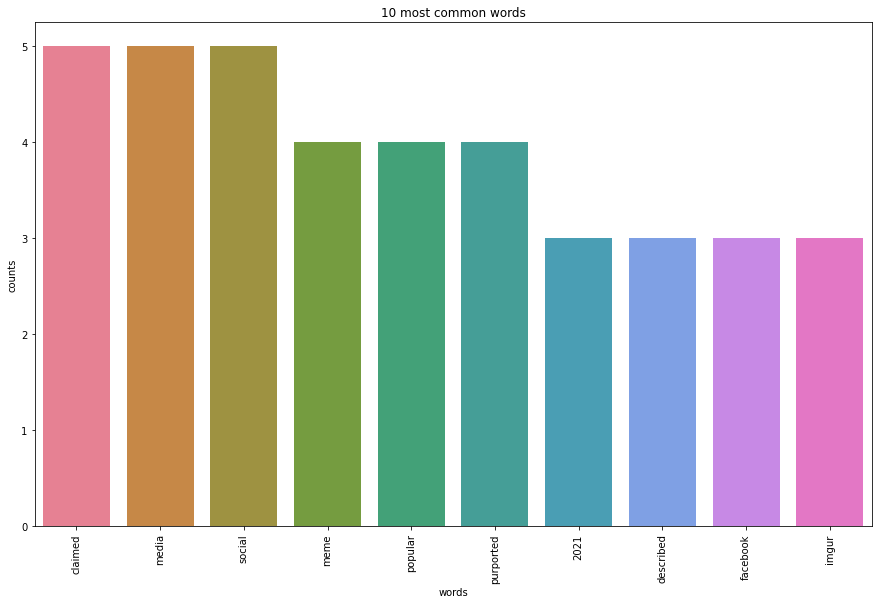

In [ ]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## **Dataset 2: Politifact Dataset**


### **Scraping Dataset**

Web scraping dataset using beautiful soap

In [ ]:
authors = []
dates = []
statements = []
sources = []
targets = []

In [ ]:
def scrape_website(page_number):
  page_num = str(page_number) #Convert the page number to a string
  URL = 'https://www.politifact.com/factchecks/list/?page='+page_num #append the page number to complete the URL
  webpage = requests.get(URL)  #Make a request to the website
  #time.sleep(3)
  soup = BeautifulSoup(webpage.text, "html.parser") #Parse the text from the website
  #Get the tags and it's class
  statement_footer =  soup.find_all('footer',attrs={'class':'m-statement__footer'})  #Get the tag and it's class
  statement_quote = soup.find_all('div', attrs={'class':'m-statement__quote'}) #Get the tag and it's class
  statement_meta = soup.find_all('div', attrs={'class':'m-statement__meta'})#Get the tag and it's class
  target = soup.find_all('div', attrs={'class':'m-statement__meter'}) #Get the tag and it's class
  #loop through the footer class m-statement__footer to get the date and author
  for i in statement_footer:
    link1 = i.text.strip()
    name_and_date = link1.split()
    first_name = name_and_date[1]
    last_name = name_and_date[2]
    full_name = first_name+' '+last_name
    month = name_and_date[4]
    day = name_and_date[5]
    year = name_and_date[6]
    date = month+' '+day+' '+year
    dates.append(date)
    authors.append(full_name)
  #Loop through the div m-statement__quote to get the link
  for i in statement_quote:
    link2 = i.find_all('a')
    statements.append(link2[0].text.strip())
 #Loop through the div m-statement__meta to get the source
  for i in statement_meta:
    link3 = i.find_all('a') #Source
    source_text = link3[0].text.strip()
    sources.append(source_text)
  #Loop through the target or the div m-statement__meter to get the facts about the statement (True or False)
  for i in target:
    fact = i.find('div', attrs={'class':'c-image'}).find('img').get('alt')
    targets.append(fact)

In [ ]:
n=2
for i in range(1, n):
  scrape_website(i)

In [ ]:
data = pd.DataFrame(columns = [ 'statement', 'target']) 
data['statement'] = statements
data['target'] = targets
#Show the data set



In [ ]:
data

,statement,target
0,“Malcolm X’s daughter found dead in NYC days a...,barely-true
1,Vaccinated people under 60 in England “are dyi...,barely-true
2,“Only Reuters” reported that the doctor who de...,false
3,"“COVID death rates 4 to 1, vaccinated to unvax...",false
4,We know in November 2021 that “none of your pr...,false
5,"“Within two years, there were two 500-year (st...",mostly-true
6,Omicron 'hysteria' was timed so that it would ...,pants-fire
7,The omicron variant’s name is evidence the cor...,false
8,"Says a Vox headline said, “teaching children t...",false
9,"""U.S. households are on track to spend $19 bil...",half-true


## **Dataset 3: Liar Liar Dataset**

### **Data collection**

Downloading Dataset from Google Drive

In [ ]:
!gdown --id '1OWZv1DPnwAe5t6Y5T1syEnBIazjvZRu4'

Downloading...
From: https://drive.google.com/uc?id=1OWZv1DPnwAe5t6Y5T1syEnBIazjvZRu4
To: /content/liar_dataset.zip
100% 1.01M/1.01M [00:00<00:00, 61.6MB/s]


In [ ]:

import zipfile
with zipfile.ZipFile('liar_dataset.zip', 'r') as zip_ref:

    zip_ref.extractall()

#Getting the train data
liar_train = pd.read_csv('train.tsv', sep='\t',header=None)
liar_train=liar_train.drop(columns=[0])

In [ ]:
columns=[
'label',
'statement',
'subject',
'speaker',
'speaker_job_title',
'state_info',
'affiliation',
'barely_true_counts',
'false_counts',
'half_true_counts',
'mostly_true_counts',
'pants_on_fire_counts',
'context'
]


liar_train.columns=columns

In [ ]:
liar_train.label

0              false
1          half-true
2        mostly-true
3              false
4          half-true
            ...     
10235    mostly-true
10236    mostly-true
10237      half-true
10238          false
10239     pants-fire
Name: label, Length: 10240, dtype: object

In [ ]:
liar_train=liar_train[['statement','label']]

In [ ]:
liar_train.columns=['statement','target']

In [ ]:
liar_train

,statement,target
0,Says the Annies List political group supports ...,false
1,When did the decline of coal start? It started...,half-true
2,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true
3,Health care reform legislation is likely to ma...,false
4,The economic turnaround started at the end of ...,half-true
...,...,...
10235,There are a larger number of shark attacks in ...,mostly-true
10236,Democrats have now become the party of the [At...,mostly-true
10237,Says an alternative to Social Security that op...,half-true
10238,On lifting the U.S. Cuban embargo and allowing...,false


## **Data Amalgamation:**

Combining all three datasets

In [ ]:
liar_train=liar_train.dropna().drop_duplicates()
data=data.dropna().drop_duplicates()
data_truth_or_fiction=data_truth_or_fiction.dropna().drop_duplicates()

In [ ]:
df=pd.concat([data,data_truth_or_fiction,liar_train])

In [ ]:
df

,statement,target
0,“Malcolm X’s daughter found dead in NYC days a...,barely-true
1,Vaccinated people under 60 in England “are dyi...,barely-true
2,“Only Reuters” reported that the doctor who de...,false
3,"“COVID death rates 4 to 1, vaccinated to unvax...",false
4,We know in November 2021 that “none of your pr...,false
...,...,...
10235,There are a larger number of shark attacks in ...,mostly-true
10236,Democrats have now become the party of the [At...,mostly-true
10237,Says an alternative to Social Security that op...,half-true
10238,On lifting the U.S. Cuban embargo and allowing...,false


### **Data Cleaning**

Cleaning the dataset includes: Stopwords removal, stemming, lemmatization, converting to lowercase, removing punctuations, special characters and digits, and word tokenization

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def get_POS_tags(statement):
  tokens = nltk.word_tokenize(statement)
  text = nltk.Text(tokens)
  tags = nltk.pos_tag(text)
  counts = Counter(tag for word,tag in tags)
  noun_counts=counts['NN']+counts['NNS']+counts['NNP']+counts['NNPS']
  verb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  adverbverb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  adjective_counts=counts['JJ']+counts['JJR']+counts['JJS']
  possessive_ending_counts=counts['POS']
  return noun_counts,verb_counts,adverbverb_counts,adjective_counts,possessive_ending_counts

In [ ]:
df['statement']=df['statement'].astype(str)
df['Lower']=df['statement'].str.lower()
df['Lower']=df['Lower'].str.replace('\d+', '')
df['Lower']=df['Lower'].str.replace(r"http\S+", '')
df['Lower']=df['Lower'].str.replace('[^A-Za-z ]+', '')
df

,statement,target,Lower
0,“Malcolm X’s daughter found dead in NYC days a...,barely-true,malcolm xs daughter found dead in nyc days aft...
1,Vaccinated people under 60 in England “are dyi...,barely-true,vaccinated people under in england are dying ...
2,“Only Reuters” reported that the doctor who de...,false,only reuters reported that the doctor who dete...
3,"“COVID death rates 4 to 1, vaccinated to unvax...",false,covid death rates to vaccinated to unvaxxed
4,We know in November 2021 that “none of your pr...,false,we know in november that none of your previou...
...,...,...,...
10235,There are a larger number of shark attacks in ...,mostly-true,there are a larger number of shark attacks in ...
10236,Democrats have now become the party of the [At...,mostly-true,democrats have now become the party of the atl...
10237,Says an alternative to Social Security that op...,half-true,says an alternative to social security that op...
10238,On lifting the U.S. Cuban embargo and allowing...,false,on lifting the us cuban embargo and allowing t...


In [ ]:
stop_words = set(stopwords.words('english')) 
df['statement_without_stopwords'] = df['Lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

,statement,target,Lower,statement_without_stopwords
0,“Malcolm X’s daughter found dead in NYC days a...,barely-true,malcolm xs daughter found dead in nyc days aft...,malcolm xs daughter found dead nyc days expose...
1,Vaccinated people under 60 in England “are dyi...,barely-true,vaccinated people under in england are dying ...,vaccinated people england dying twice rate unv...
2,“Only Reuters” reported that the doctor who de...,false,only reuters reported that the doctor who dete...,reuters reported doctor detected omicron varia...
3,"“COVID death rates 4 to 1, vaccinated to unvax...",false,covid death rates to vaccinated to unvaxxed,covid death rates vaccinated unvaxxed
4,We know in November 2021 that “none of your pr...,false,we know in november that none of your previou...,know november none previous vaccines protect e...
...,...,...,...,...
10235,There are a larger number of shark attacks in ...,mostly-true,there are a larger number of shark attacks in ...,larger number shark attacks florida cases vote...
10236,Democrats have now become the party of the [At...,mostly-true,democrats have now become the party of the atl...,democrats become party atlanta metro area blacks
10237,Says an alternative to Social Security that op...,half-true,says an alternative to social security that op...,says alternative social security operates galv...
10238,On lifting the U.S. Cuban embargo and allowing...,false,on lifting the us cuban embargo and allowing t...,lifting us cuban embargo allowing travel cuba


In [ ]:
stemmer = SnowballStemmer("english")
lem=WordNetLemmatizer()
df['lemm'] = df['statement_without_stopwords'].apply(lambda x: ' '.join([lem.lemmatize(y) for y in x.split()]))
df['stemmed'] = df['lemm'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x.split()]))
df

,statement,target,Lower,statement_without_stopwords,lemm,stemmed
0,“Malcolm X’s daughter found dead in NYC days a...,barely-true,malcolm xs daughter found dead in nyc days aft...,malcolm xs daughter found dead nyc days expose...,malcolm x daughter found dead nyc day exposed ...,malcolm x daughter found dead nyc day expos ny...
1,Vaccinated people under 60 in England “are dyi...,barely-true,vaccinated people under in england are dying ...,vaccinated people england dying twice rate unv...,vaccinated people england dying twice rate unv...,vaccin peopl england die twice rate unvaccin p...
2,“Only Reuters” reported that the doctor who de...,false,only reuters reported that the doctor who dete...,reuters reported doctor detected omicron varia...,reuters reported doctor detected omicron varia...,reuter report doctor detect omicron variant sa...
3,"“COVID death rates 4 to 1, vaccinated to unvax...",false,covid death rates to vaccinated to unvaxxed,covid death rates vaccinated unvaxxed,covid death rate vaccinated unvaxxed,covid death rate vaccin unvaxx
4,We know in November 2021 that “none of your pr...,false,we know in november that none of your previou...,know november none previous vaccines protect e...,know november none previous vaccine protect em...,know novemb none previous vaccin protect emerg...
...,...,...,...,...,...,...
10235,There are a larger number of shark attacks in ...,mostly-true,there are a larger number of shark attacks in ...,larger number shark attacks florida cases vote...,larger number shark attack florida case voter ...,larger number shark attack florida case voter ...
10236,Democrats have now become the party of the [At...,mostly-true,democrats have now become the party of the atl...,democrats become party atlanta metro area blacks,democrat become party atlanta metro area black,democrat becom parti atlanta metro area black
10237,Says an alternative to Social Security that op...,half-true,says an alternative to social security that op...,says alternative social security operates galv...,say alternative social security operates galve...,say altern social secur oper galveston counti ...
10238,On lifting the U.S. Cuban embargo and allowing...,false,on lifting the us cuban embargo and allowing t...,lifting us cuban embargo allowing travel cuba,lifting u cuban embargo allowing travel cuba,lift u cuban embargo allow travel cuba


## **Final Dataset**

In [ ]:
df_final=df[['stemmed','target']]
df_final=df_final.rename(columns={'stemmed': "PreProcessed Statement"})
df_final

,PreProcessed Statement,target
0,malcolm x daughter found dead nyc day expos ny...,barely-true
1,vaccin peopl england die twice rate unvaccin p...,barely-true
2,reuter report doctor detect omicron variant sa...,false
3,covid death rate vaccin unvaxx,false
4,know novemb none previous vaccin protect emerg...,false
...,...,...
10235,larger number shark attack florida case voter ...,mostly-true
10236,democrat becom parti atlanta metro area black,mostly-true
10237,say altern social secur oper galveston counti ...,half-true
10238,lift u cuban embargo allow travel cuba,false


In [ ]:
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## **Generating Microfactors**

### **Microfactor1: POS Tags**

Parts-of-Speech (PoS) tags: are the labels or annotations that identify the word’s function in a given language. In general, words can be categorized into several parts of speech categories

In [ ]:
def get_POS_tags(statement):
  tokens = nltk.word_tokenize(statement)
  text = nltk.Text(tokens)
  tags = nltk.pos_tag(text)
  counts = Counter(tag for word,tag in tags)
  noun_counts=counts['NN']+counts['NNS']+counts['NNP']+counts['NNPS']
  verb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  adverbverb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  adjective_counts=counts['JJ']+counts['JJR']+counts['JJS']
  possessive_ending_counts=counts['POS']
  return noun_counts,verb_counts,adverbverb_counts,adjective_counts,possessive_ending_counts

In [ ]:
df_final['noun_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[0])

In [ ]:
df_final['verb_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[1])

In [ ]:
df_final['adverb_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[2])

In [ ]:
df_final['adjective_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[3])

In [ ]:
df_final['possessive_ending_counts']=df_final['PreProcessed Statement'].apply(lambda x:get_POS_tags(x)[4])

In [ ]:
df_final

,PreProcessed Statement,target,noun_counts,verb_counts,adverb_counts,adjective_counts,possessive_ending_counts
0,malcolm x daughter found dead nyc day expos ny...,barely-true,7,3,3,3,0
1,vaccin peopl england die twice rate unvaccin p...,barely-true,8,3,3,2,0
2,reuter report doctor detect omicron variant sa...,false,6,1,1,2,0
3,covid death rate vaccin unvaxx,false,3,1,1,1,0
4,know novemb none previous vaccin protect emerg...,false,3,1,1,3,0
...,...,...,...,...,...,...,...
10235,larger number shark attack florida case voter ...,mostly-true,7,0,0,1,0
10236,democrat becom parti atlanta metro area black,mostly-true,5,0,0,2,0
10237,say altern social secur oper galveston counti ...,half-true,7,2,2,6,0
10238,lift u cuban embargo allow travel cuba,false,5,1,1,1,0


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

### **Microfactor 2: Sentiment Polarity**

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df_final['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_final['PreProcessed Statement']]
df_final['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_final['PreProcessed Statement']]
df_final['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_final['PreProcessed Statement']]
df_final['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_final['PreProcessed Statement']]

In [ ]:
df_final

,PreProcessed Statement,target,noun_counts,verb_counts,adverb_counts,adjective_counts,possessive_ending_counts,compound,neg,neu,pos
0,malcolm x daughter found dead nyc day expos ny...,barely-true,7,3,3,3,0,-0.6486,0.281,0.719,0.000
1,vaccin peopl england die twice rate unvaccin p...,barely-true,8,3,3,2,0,-0.5994,0.231,0.769,0.000
2,reuter report doctor detect omicron variant sa...,false,6,1,1,2,0,0.0000,0.000,1.000,0.000
3,covid death rate vaccin unvaxx,false,3,1,1,1,0,-0.5994,0.494,0.506,0.000
4,know novemb none previous vaccin protect emerg...,false,3,1,1,3,0,-0.2924,0.214,0.786,0.000
...,...,...,...,...,...,...,...,...,...,...,...
10235,larger number shark attack florida case voter ...,mostly-true,7,0,0,1,0,-0.7650,0.523,0.379,0.098
10236,democrat becom parti atlanta metro area black,mostly-true,5,0,0,2,0,0.0000,0.000,1.000,0.000
10237,say altern social secur oper galveston counti ...,half-true,7,2,2,6,0,0.0000,0.000,1.000,0.000
10238,lift u cuban embargo allow travel cuba,false,5,1,1,1,0,0.2263,0.000,0.725,0.275


In [ ]:
df_final.target.value_counts()

half-true      2115
false          2003
mostly-true    1964
true           1674
barely-true    1663
pants-fire      840
False            12
True              8
Name: target, dtype: int64

### **Classifying the target from politifact labels to 1-6 true-o-meter**

In [ ]:
def get_new_target(target):
  if target=='True' or target==True or target=='mostly-true' or target=='half-true' or target=='true':
    return 1
  else:
    return 0

In [ ]:
def get_target(target):
  if target=='True' or target==True or target=='true':
    return 5
  elif target=='mostly-true':
    return 4
  elif target=='half-true':
    return 3
  elif target=='barely-true':
    return 2
  elif target=='False' or target=='false' or targets==False:
    return 1
  else:
    return 0
    

In [ ]:
df_final['new_target']=df_final['target'].apply(lambda x:get_new_target(x))

In [ ]:
df_final['target']=df_final['target'].apply(lambda x:get_target(x))

### **Microfactor 3: TFIDF**

In [ ]:
import scipy

In [ ]:
tfidf_vect.fit_transform(df_final['PreProcessed Statement'])

<10279x300 sparse matrix of type '<class 'numpy.float64'>'
	with 54598 stored elements in Compressed Sparse Row format>

In [ ]:
X = scipy.sparse.hstack((tfidf_vect.fit_transform(df_final['PreProcessed Statement']),df_final[['noun_counts', 'verb_counts',
       'adverb_counts', 'adjective_counts', 'possessive_ending_counts',
       'compound', 'neg', 'neu', 'pos']].values),format='csr')
X_columns=tfidf_vect.get_feature_names()+df_final[['noun_counts', 'verb_counts',
       'adverb_counts', 'adjective_counts', 'possessive_ending_counts',
       'compound', 'neg', 'neu', 'pos']].columns.tolist()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### **Using pickle to dump tf_idf vectorizer**

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf_vect, open('tfidf', 'wb'))

## **Model Training** with 6 classes(of fakeness)

Training 9 different models ("Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA") to predict fakeness of statement between 1-6  using all the microfactors above after data amalgamation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from time import time
import seaborn as sns

Classifier = Nearest Neighbors, Score (test, accuracy) = 17.67, Training time = 1.70 seconds
[[ 53  89  49  54  16   4]
 [108 194 114 105  51  11]
 [101 183 119 105  42  10]
 [100 206 144  99  58  14]
 [ 96 165 120 107  66  16]
 [ 67 158 101  94  51  14]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Linear SVM, Score (test, accuracy) = 20.91, Training time = 24.91 seconds
[[  0 155   0 110   0   0]
 [  0 332   0 251   0   0]
 [  0 284   0 276   0   0]
 [  0 308   0 313   0   0]
 [  0 299   0 271   0   0]
 [  0 272   0 213   0   0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = RBF SVM, Score (test, accuracy) = 21.14, Training time = 37.26 seconds
[[  1  38   1 194  25   6]
 [  1 107   3 391  70  11]
 [  0  72   2 419  63   4]
 [  0  

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Classifier = QDA, Score (test, accuracy) = 16.41, Training time = 0.90 seconds
[[160   7  48   2  27  21]
 [278  17 130  11  98  49]
 [250  13 133  17 107  40]
 [265  17 137  14 136  52]
 [225  17 112  14 128  74]
 [182   8 102  13 126  54]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
--------------------------------------------------------------------------------
Best --> Classifier = Neural Net, Score (test, accuracy) = 23.18
{'Nearest Neighbors': 17.671854734111545, 'Linear SVM': 20.914396887159533, 'RBF SVM': 21.141374837872892, 'Decision Tree': 21.108949416342412, 'Random Forest': 20.557717250324252, 'Neural Net': 23.184176394293125, 'AdaBoost': 20.849546044098574, 'Naive Bayes': 17.833981841763944, 'QDA': 16.407263294422826}


Text(0.5, 1.0, 'Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

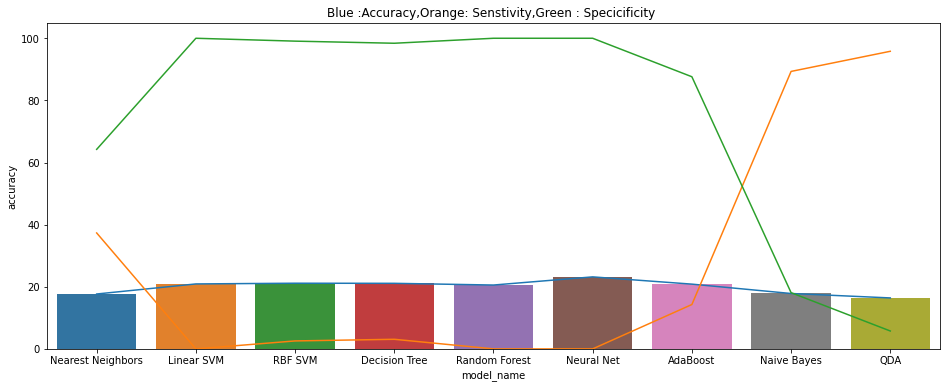

In [ ]:
trainX, testX = train_test_split(X , test_size=0.30, random_state=1)
trainY, testY = train_test_split(df_final['target'], test_size=0.30, random_state=1)
trainX

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA",
        ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

    ]

max_score = 0.0
max_class = ''
# iterate over classifiers
score_compare={}
index=0
accuracy={}
specificity={}
sensitivity={}

for name, clf in zip(names, classifiers):
    # print(accuracy)
    start_time = time()
    clf.fit(trainX.toarray(), trainY)
    score = 100.0 * clf.score(testX.toarray(), testY)
    y_pred=clf.predict(testX.toarray())
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    pickle.dump(clf, open(name, 'wb'))

    accuracy[names[index]]=accuracy_score(testY,y_pred)*100
    cm=confusion_matrix(testY, y_pred)

    print(cm)
    sensitivity[names[index]] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
    specificity[names[index]] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
    index+=1
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

    print(80*'-*')

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
print(accuracy)
accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
# print(accuracy)
accuracy.columns=['model_name','accuracy']
sensitivity.columns=['model_name','sensitivity']
specificity.columns=['model_name','specificity']
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

## **Model Training** with 2 classes(of fakeness)

Training 9 different models ("Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA") to predict fakeness of statement between 1-2 using all the microfactors above after data amalgamation to see if the accuracy changes.

In [ ]:
trainX, testX = train_test_split(X , test_size=0.30, random_state=1)
trainY, testY = train_test_split(df_final['new_target'], test_size=0.30, random_state=1)
trainX

<7195x309 sparse matrix of type '<class 'numpy.float64'>'
	with 77572 stored elements in Compressed Sparse Row format>

Classifier = Nearest Neighbors, Score (test, accuracy) = 49.58, Training time = 1.59 seconds
[[1010  398]
 [1157  519]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Linear SVM, Score (test, accuracy) = 54.35, Training time = 20.78 seconds
[[   0 1408]
 [   0 1676]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = RBF SVM, Score (test, accuracy) = 54.57, Training time = 33.23 seconds
[[  53 1355]
 [  46 1630]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Decision Tree, Score (test, accuracy) = 56.29, Training time = 0.13 seconds
[[ 134 1274]
 [  74 1602]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Classifier = QDA, Score (test, accuracy) = 55.58, Training time = 0.54 seconds
[[865 543]
 [827 849]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
--------------------------------------------------------------------------------
Best --> Classifier = Neural Net, Score (test, accuracy) = 59.50
{'Nearest Neighbors': 49.578469520103766, 'Linear SVM': 54.345006485084305, 'RBF SVM': 54.57198443579766, 'Decision Tree': 56.2905317769131, 'Random Forest': 54.31258106355382, 'Neural Net': 59.50064850843061, 'AdaBoost': 58.819714656290536, 'Naive Bayes': 56.97146562905318, 'QDA': 55.577172503242544}


Text(0.5, 1.0, 'Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

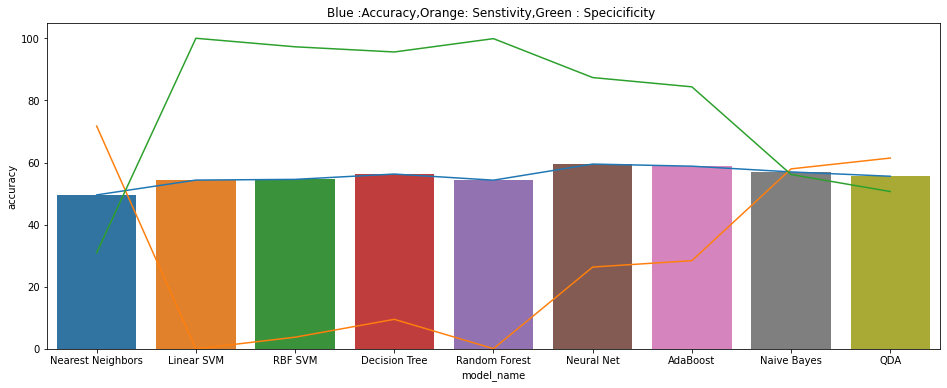

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA",
#          "LinearRegression"
        ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
#     LinearRegression()
    ]

max_score = 0.0
max_class = ''
# iterate over classifiers
score_compare={}
index=0
accuracy={}
specificity={}
sensitivity={}

for name, clf in zip(names, classifiers):
    # print(accuracy)
    start_time = time()
    clf.fit(trainX.toarray(), trainY)
    score = 100.0 * clf.score(testX.toarray(), testY)
    y_pred=clf.predict(testX.toarray())
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    #   Dumping all the models using pickle
    pickle.dump(clf, open(name, 'wb'))
    
    accuracy[names[index]]=accuracy_score(testY,y_pred)*100
    cm=confusion_matrix(testY, y_pred)

    print(cm)
    sensitivity[names[index]] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
    specificity[names[index]] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
    index+=1
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

    print(80*'-*')

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
print(accuracy)
accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
# print(accuracy)
accuracy.columns=['model_name','accuracy']
sensitivity.columns=['model_name','sensitivity']
specificity.columns=['model_name','specificity']
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

## **Generating sentiment score**
Using Neural Net classifier as it as the highest accuracy

In [ ]:
!pip install nltk

In [ ]:
import pickle
import re
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader')

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import scipy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Error loading vader: Package 'vader' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
def get_POS_tags(statement):
  tokens = nltk.word_tokenize(statement)
  text = nltk.Text(tokens)
  tags = nltk.pos_tag(text)
  counts = Counter(tag for word,tag in tags)
  noun_counts=counts['NN']+counts['NNS']+counts['NNP']+counts['NNPS']
  verb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  adverbverb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  adjective_counts=counts['JJ']+counts['JJR']+counts['JJS']
  possessive_ending_counts=counts['POS']
  return noun_counts,verb_counts,adverbverb_counts,adjective_counts,possessive_ending_counts

In [ ]:

def get_sentiment_score(statement):
  model=pickle.load(open('/content/Neural Net', 'rb'))
  tfidf_vect=pickle.load(open('/content/tfidf', 'rb'))
  stop_words = set(stopwords.words('english'))
  stemmer = SnowballStemmer("english")
  lem=WordNetLemmatizer()
  analyzer = SentimentIntensityAnalyzer()

  p_statement= re.sub(r"\W", " ",str(statement))
  p_statement=re.sub(r'[,\.!?]', " ",str(p_statement))
  p_statement=re.sub(r" \d+", " ",str(p_statement))
  p_statement=word_tokenize(p_statement.lower())
  p_statement=' '.join(p_statement)
  p_statement=' '.join([word for word in p_statement.split() if word not in stop_words])
  p_statement=' '.join([lem.lemmatize(word) for word in p_statement.split()])
  p_statement=' '.join([stemmer.stem(word) for word in p_statement.split()])
  noun_counts,verb_counts,adverbverb_counts,adjective_counts,possessive_ending_counts=get_POS_tags(p_statement)

  compound= analyzer.polarity_scores(p_statement)['compound']
  neg=  analyzer.polarity_scores(p_statement)['neg'] 
  neu = analyzer.polarity_scores(p_statement)['neu']
  pos = analyzer.polarity_scores(p_statement)['pos']

  X=[noun_counts,verb_counts,adverbverb_counts,adjective_counts,possessive_ending_counts,compound,neg,neu,pos]
  vector=tfidf_vect.transform([p_statement])

  final_input=scipy.sparse.hstack((vector,X),format='csr')
  
  prediction=model.predict(final_input)
  prediction_probability=model.predict_proba(final_input)[:,1]
  return prediction_probability.item(0)

In [ ]:
get_sentiment_score('sad')

0.3001182723057658